In [80]:
#import neccessary library 
import numpy as np
import pandas as pd 
import requests 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
import plotly.graph_objects as go
from plotly.subplots import make_subplots

<h1 style="text-align: center;">VIETNAMESE DATASET AIR POLUTION 2021</h1>

## **Collect Data**

In [81]:
data = pd.read_csv('historical_air_quality_2021_en.csv')
data.head()

,Station ID,AQI index,Location,Station name,Url,Dominent pollutant,CO,Dew,Humidity,NO2,...,Pressure,PM10,PM2.5,SO2,Temperature,Wind,Data Time S,Data Time Tz,Status,Alert level
0,8767.0,102.00,"10.782978,106.700711","Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",https://aqicn.org/city/vietnam/ho-chi-minh-cit...,pm25,-,NaN,83.0,-,...,"1,009.00",NaN,102.00,-,27.0,3.6,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?
1,8688.0,221.00,"21.0811211,105.8180306","United Nations International School of Hanoi, ...",https://aqicn.org/city/vietnam/hanoi/unis,aqi,-,NaN,77.0,-,...,"1,015.00",NaN,-,-,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
2,8641.0,281.00,"21.0215063,105.8188748","Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",https://aqicn.org/city/vietnam/hanoi/us-embassy,pm25,0.30,NaN,77.0,8.70,...,"1,015.00",NaN,281.00,2.10,18.0,1.5,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
3,13012.0,36.00,"13.998599,107.996482","Gia Lai/phường Thống Nhất - Pleiku, Vietnam",https://aqicn.org/city/vietnam/gia-lai/phuong-...,pm25,3.00,NaN,60.2,6.00,...,923.70,29.00,36.00,1.00,24.3,1.0,2021-01-21 20:00:00,+07:00,#NAME?,#NAME?
4,12488.0,68.00,"16.46226,107.596351","Thừa Thiên Huế/83 Hùng Vương, Vietnam",https://aqicn.org/city/vietnam/thua-thien-hue/...,pm25,2.00,NaN,88.0,-,...,"1,015.00",52.00,68.00,-,21.0,1.0,2021-01-21 19:00:00,+07:00,#NAME?,#NAME?


## **Data Explore**

**The number of rows and columns**

In [82]:
rows, cols = data.shape
rows, cols

(3415, 21)

In [83]:
data.columns

Index(['Station ID', 'AQI index', 'Location', 'Station name', 'Url',
       'Dominent pollutant', 'CO', 'Dew', 'Humidity', 'NO2', 'O3', 'Pressure',
       'PM10', 'PM2.5', 'SO2', 'Temperature', 'Wind', 'Data Time S',
       'Data Time Tz', 'Status', 'Alert level'],
      dtype='object')

**This `Dataset on air quality in Vietnam in 2021` has 3415 rows and 21 columns**


|Column|Meanings
| :------ | ---
| Station ID  | Index
| AQI index  | Air quality index
| Location | Location
| Station name | Name of the station
| Url | Link to Real time AQI
| Dominent pollutant |Dominant Species
| CO | CO Concentration
| Dew | Fog Index
| Humidity | Humidity Index
| NO2 | NO2 Concentration
| O3 | O3 Concentration
| Pressure | Pressure Index
| PM10 | Particulate matter of 10 micrometers or less in diameter
| PM2.5 | Particulate matter of 2.5 micrometers or less in diameter
| SO2 | SO2 Concentration
| Temperature | Temperature Index
| Wind | Wind speed
| Data Time S | Update time
| Data Time Tz | Time zone
| Status | Alert Status
| Alert level | Alert level

In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3415 entries, 0 to 3414
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Station ID          2622 non-null   float64
 1   AQI index           2618 non-null   object 
 2   Location            2622 non-null   object 
 3   Station name        2622 non-null   object 
 4   Url                 2622 non-null   object 
 5   Dominent pollutant  2114 non-null   object 
 6   CO                  2615 non-null   object 
 7   Dew                 2263 non-null   float64
 8   Humidity            2608 non-null   float64
 9   NO2                 2615 non-null   object 
 10  O3                  2608 non-null   object 
 11  Pressure            2608 non-null   object 
 12  PM10                2583 non-null   object 
 13  PM2.5               2614 non-null   object 
 14  SO2                 2614 non-null   object 
 15  Temperature         2615 non-null   float64
 16  Wind  

## **Preprocessing**

**Convert object to numeric datatypes**

In [85]:
columns = ['AQI index','Location','Dominent pollutant', 'CO', 'NO2', 'O3', 'Pressure',\
       'PM10', 'PM2.5', 'SO2']

In [86]:
data[columns] = data[columns].astype(str).apply(lambda x: pd.to_numeric(x.str.replace('\D','',regex=True)))

In [87]:
data.describe()

,Station ID,AQI index,Location,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind
count,2622.000000,2101.000000,2.622000e+03,2008.000000,2155.000000,2263.000000,2608.000000,1992.000000,1227.000000,2608.000000,1888.000000,2184.000000,1261.000000,2615.000000,2615.000000
mean,11079.826087,6663.874346,6.484687e+17,22.885956,961.350348,22.248210,75.790529,1350.085341,1022.290139,100350.479294,4540.338983,6324.061355,1467.581285,26.227036,2.922141
std,3548.080424,4701.377106,9.768920e+17,5.220637,1377.657636,4.256875,16.469530,1223.114050,1108.902307,1908.443486,3516.254299,4571.408248,4084.941581,4.733196,3.886933
min,1584.000000,100.000000,1.607411e+10,10.000000,10.000000,5.500000,13.000000,100.000000,90.000000,91690.000000,50.000000,50.000000,10.000000,0.500000,0.200000
25%,8767.000000,3200.000000,2.101525e+14,25.000000,200.000000,20.750000,62.400000,500.000000,200.000000,100200.000000,1975.000000,2975.000000,200.000000,23.000000,2.000000
50%,13012.000000,5800.000000,1.646226e+15,25.000000,500.000000,22.900000,78.000000,1000.000000,650.000000,100900.000000,4200.000000,5400.000000,500.000000,26.000000,2.800000
75%,13019.000000,9100.000000,2.102722e+18,25.000000,1000.000000,25.000000,88.500000,1900.000000,1400.000000,101200.000000,6300.000000,9100.000000,1200.000000,29.500000,3.600000
max,13252.000000,34000.000000,2.232214e+18,25.000000,9800.000000,29.000000,100.000000,8000.000000,9300.000000,102450.000000,34000.000000,31500.000000,50000.000000,39.000000,150.000000


 ##### **Value distribution of Numeric Columns**

In [88]:
df = data.describe()
df = df.append((1 - df.loc['count'].rename('Missing_Ratio')/len(data))*100)
df

C:\Users\Bui Lam\AppData\Local\Temp\ipykernel_20444\2915279914.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,Station ID,AQI index,Location,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind
count,2622.000000,2101.000000,2.622000e+03,2008.000000,2155.000000,2263.000000,2608.000000,1992.000000,1227.000000,2608.000000,1888.000000,2184.000000,1261.000000,2615.000000,2615.000000
mean,11079.826087,6663.874346,6.484687e+17,22.885956,961.350348,22.248210,75.790529,1350.085341,1022.290139,100350.479294,4540.338983,6324.061355,1467.581285,26.227036,2.922141
std,3548.080424,4701.377106,9.768920e+17,5.220637,1377.657636,4.256875,16.469530,1223.114050,1108.902307,1908.443486,3516.254299,4571.408248,4084.941581,4.733196,3.886933
min,1584.000000,100.000000,1.607411e+10,10.000000,10.000000,5.500000,13.000000,100.000000,90.000000,91690.000000,50.000000,50.000000,10.000000,0.500000,0.200000
25%,8767.000000,3200.000000,2.101525e+14,25.000000,200.000000,20.750000,62.400000,500.000000,200.000000,100200.000000,1975.000000,2975.000000,200.000000,23.000000,2.000000
50%,13012.000000,5800.000000,1.646226e+15,25.000000,500.000000,22.900000,78.000000,1000.000000,650.000000,100900.000000,4200.000000,5400.000000,500.000000,26.000000,2.800000
75%,13019.000000,9100.000000,2.102722e+18,25.000000,1000.000000,25.000000,88.500000,1900.000000,1400.000000,101200.000000,6300.000000,9100.000000,1200.000000,29.500000,3.600000
max,13252.000000,34000.000000,2.232214e+18,25.000000,9800.000000,29.000000,100.000000,8000.000000,9300.000000,102450.000000,34000.000000,31500.000000,50000.000000,39.000000,150.000000
Missing_Ratio,23.221083,38.477306,2.322108e+01,41.200586,36.896047,33.733529,23.631040,41.669107,64.070278,23.631040,44.714495,36.046852,63.074671,23.426061,23.426061


In [89]:
df.describe()

,Station ID,AQI index,Location,Dominent pollutant,CO,Dew,Humidity,NO2,O3,Pressure,PM10,PM2.5,SO2,Temperature,Wind
count,9.000000,9.000000,9.000000e+00,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,7434.125288,7300.525418,6.624615e+17,243.034131,1782.322670,269.598735,340.643455,1789.652055,1673.584747,66814.505980,6279.367531,6904.501828,6531.844171,309.709588,311.537237
std,5461.481356,10451.954405,9.239423e+17,661.940538,3086.412855,747.589458,850.872729,2432.407460,2904.673009,49076.990267,10600.143168,9680.434496,16348.470294,864.566386,865.146174
min,23.221083,38.477306,2.322108e+01,5.220637,10.000000,4.256875,13.000000,41.669107,64.070278,23.631040,44.714495,36.046852,10.000000,0.500000,0.200000
25%,2622.000000,2101.000000,1.607411e+10,22.885956,200.000000,20.750000,23.631040,500.000000,200.000000,2608.000000,1888.000000,2184.000000,200.000000,23.000000,2.800000
50%,8767.000000,4701.377106,1.646226e+15,25.000000,961.350348,22.900000,75.790529,1223.114050,1022.290139,100200.000000,3516.254299,4571.408248,1200.000000,26.000000,3.600000
75%,13012.000000,6663.874346,9.768920e+17,25.000000,1377.657636,29.000000,88.500000,1900.000000,1227.000000,100900.000000,4540.338983,6324.061355,1467.581285,29.500000,23.426061
max,13252.000000,34000.000000,2.232214e+18,2008.000000,9800.000000,2263.000000,2608.000000,8000.000000,9300.000000,102450.000000,34000.000000,31500.000000,50000.000000,2615.000000,2615.000000


**MIN - MAX Scalar**

In [90]:
numeric_cols = data.select_dtypes(include=['int', 'float']).columns.tolist()

In [91]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

In [92]:
for col in numeric_cols:
    data[col] = (data[col] - data[col].min()) / (data[col].max() - data[col].min())

## 

### **VISUALIZE**

**What is the air quality index (AQI) like in station in Vietnam?**

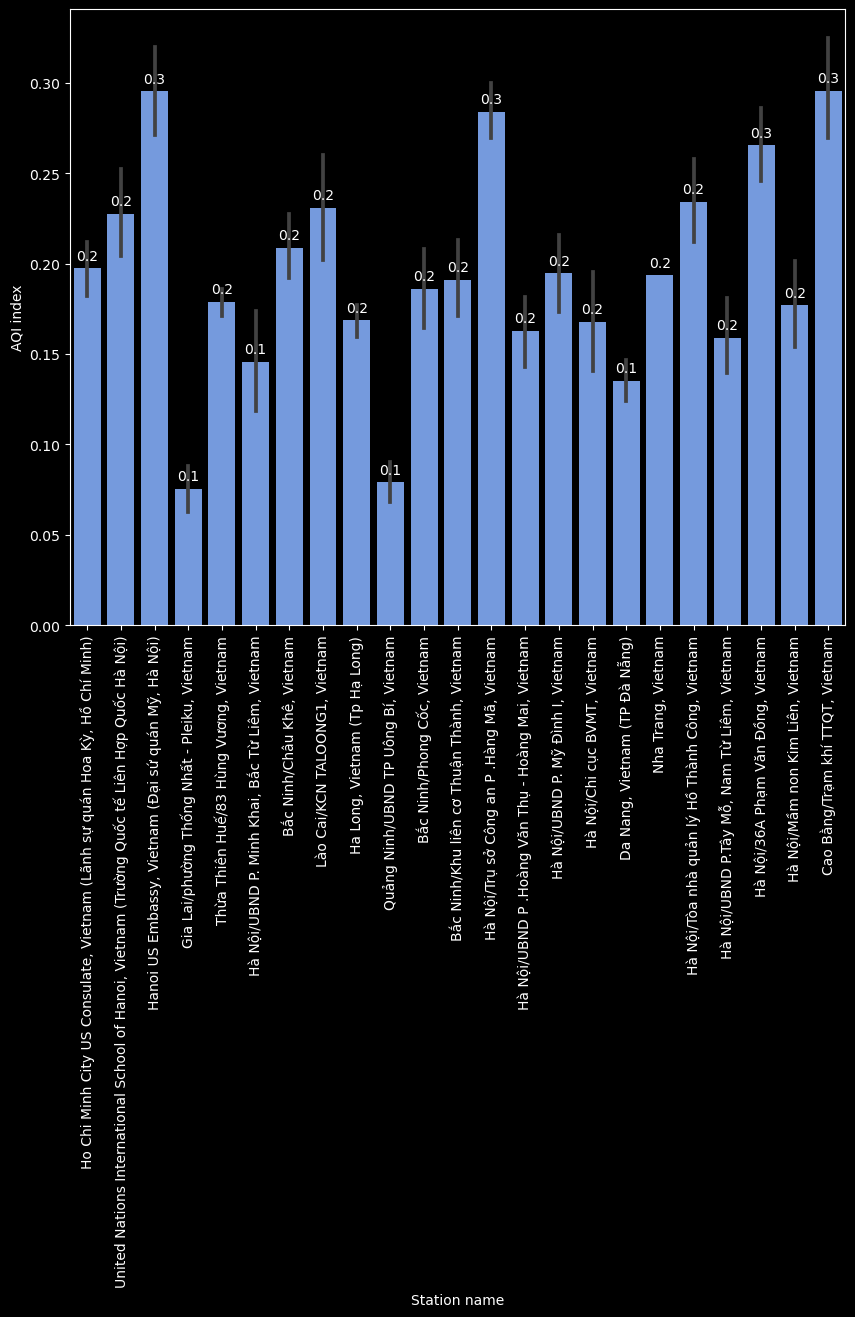

In [93]:
plt.figure(figsize=(10, 8))
splot = sns.barplot(x='Station name', y='AQI index', data= data,color = '#6495EE')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

We can see that the index fluctuates at all monitoring stations, with the highest being 0.3 and the lowest being 0.1. It can be evaluated that the air quality index in Vietnam is relatively good.

In [94]:
df_tmp = data.groupby(['Station name']).sum()[['PM2.5', 'PM10','NO2']].reset_index()
df_tmp

,Station name,PM2.5,PM10,NO2
0,"Bắc Ninh/Châu Khê, Vietnam",25.019783,17.611812,13.759494
1,"Bắc Ninh/Khu liên cơ Thuận Thành, Vietnam",23.440072,15.398897,8.189938
2,"Bắc Ninh/Phong Cốc, Vietnam",21.513275,15.505824,12.126582
3,"Cao Bằng/Trạm khí TTQT, Vietnam",29.316375,32.164948,9.424623
4,"Da Nang, Vietnam (TP Đà Nẵng)",15.916255,10.402127,10.949367
5,"Gia Lai/phường Thống Nhất - Pleiku, Vietnam",9.109698,6.586156,6.620253
6,"Ha Long, Vietnam (Tp Hạ Long)",19.723278,13.027553,17.468981
7,"Hanoi US Embassy, Vietnam (Đại sứ quán Mỹ, Hà ...",36.918919,15.078016,10.629114
8,"Ho Chi Minh City US Consulate, Vietnam (Lãnh s...",24.426073,15.078016,18.039206
9,"Hà Nội/36A Phạm Văn Đồng, Vietnam",32.457870,23.101620,29.329114


In [121]:
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'},{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=df_tmp['Station name'], values=df_tmp['PM2.5'], name="PM2.5"),
              1, 1)
fig.add_trace(go.Pie(labels=df_tmp['Station name'], values=df_tmp['PM10'], name="PM10"),
              1, 2)
fig.add_trace(go.Pie(labels=df_tmp['Station name'], values=df_tmp['NO2'], name="NO2"),
              1, 3)
fig.update_traces(hole=.4, hoverinfo="label+percent+name")
fig.update_layout(
    title_text="Global Air Pollution Vietname 2021",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='PM2.5', x=1, y=5, font_size=20, showarrow=False),
                 dict(text='PM10', x=5, y=5, font_size=30, showarrow=False),
                dict(text='NO2', x= 8.9, y=5, font_size=30, showarrow=False)])
fig.write_html('plot2.html')
fig.show()

### **MODEL PREDICT AQI INDEX**

- The **Air Quality Index (AQI)** is predicted based on the concentration of different air pollutants, including ozone (O3), nitrogen oxide (NOx), carbon monoxide (CO), and fine particulate matter such as PM2.5 and PM10. These concentrations are measured and recorded at air quality monitoring stations and then calculated to generate the AQI.
- The AQI was developed to provide the public with a simple means of understanding and comparing air quality across different areas and to help individuals make informed decisions about protecting their health. The AQI is assessed on a scale of 0 to 500, with higher values indicating more severe levels of pollution.

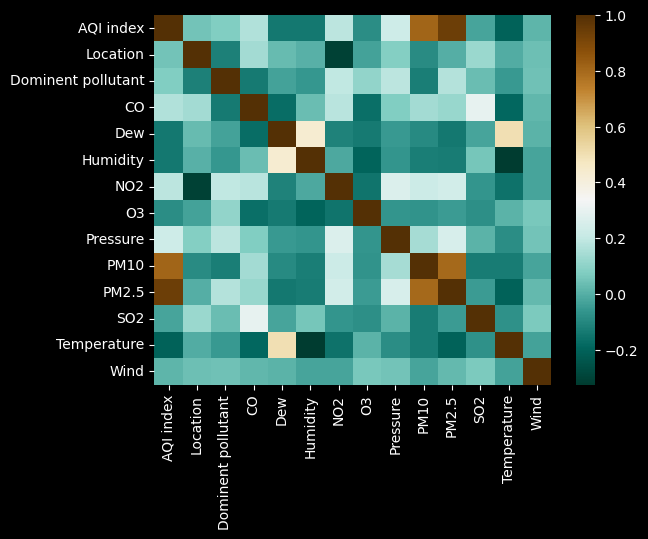

In [96]:
corr = data.drop(columns = ['Station ID']).corr()
sns.heatmap(corr, cmap = "BrBG_r")
plt.show()

We can see that the AQI index is quite dependent on the PM2.5 and PM10 indices. In addition, other air quality indices also have a significant impact on the AQI index.

In this data, we use __Linear Regression__ to predict the __AQI Index__: 

* In our __first attempt__, we only used pollution indices related to **PM10 and PM2.5** dust to evaluate the air quality  (AQI).

In [97]:
X = pd.DataFrame(data[['PM10','PM2.5']])
y = pd.DataFrame(data['AQI index'])

We use 75% data for training and 25 % for testing

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [99]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [100]:
v = pd.DataFrame(regressor.coef_, index = ['Co-efficients']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [101]:
coeff_df = pd.concat([w,v],axis=1, join = 'inner')
coeff_df

,Attribute,Co-efficients
0,PM10,0.196250
1,PM2.5,0.772129


In [102]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred

,Predicted
0,0.566188
1,0.166007
2,0.551699
3,0.193604
4,0.193604
...,...
849,0.183193
850,0.193604
851,0.222241
852,0.193604


In [103]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  0.01408679592003132
Mean Square Error:  0.0012747150393067216
Root Mean Square Error:  0.11868780864112084
R2 Score:  0.8968973801568988


- R2 Score of **0.89 indicates** that the model fits the data well and has a very high level of accuracy.As a result, it may be said that the model is trustworthy and useful for making precise predictions.
- We can observe that the model's accuracy for the PM2.5 and PM10 indices is very high, showing that these two particulate matter indices have a significant impact on air quality. These air environment indices must be improved if we want to increase air quality.


##### In our __final attempt__, We used additional air quality indices such as NO2, CO, and O3, along with PM2.5 and PM10, to make predictions the air quality (AQI).






In [104]:
X = pd.DataFrame(data[['PM10','PM2.5','CO','NO2','O3']])
y = pd.DataFrame(data['AQI index'])

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [106]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [107]:
v = pd.DataFrame(regressor.coef_, index = ['Co-efficients']).transpose()
w = pd.DataFrame(X.columns, columns = ['Attribute'])

In [108]:
coeff_df = pd.concat([w,v],axis=1, join = 'inner')
coeff_df

,Attribute,Co-efficients
0,PM10,0.192143
1,PM2.5,0.780896
2,CO,0.050425
3,NO2,-0.058153
4,O3,-0.045082


In [109]:
y_pred = regressor.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns = ['Predicted'])
y_pred

,Predicted
0,0.570353
1,0.165765
2,0.580517
3,0.193675
4,0.197746
...,...
849,0.183146
850,0.190269
851,0.222331
852,0.193675


In [110]:
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_pred))
print('Mean Square Error: ', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error: ', np.sqrt(metrics.mean_absolute_error(y_test,y_pred)))
print('R2 Score: ', metrics.r2_score(y_test,y_pred))

Mean Absolute Error:  0.014345552811123917
Mean Square Error:  0.0011940894055205242
Root Mean Square Error:  0.1197729218610113
R2 Score:  0.9034186133843567


- In the final attempt, by adding air quality indices to improve the model, we can see that the model has achieved 90% accuracy after incorporating certain air quality indices such as CO, NO2, O3. This has improved the quality of the model and we can see that air quality indices have an impact on the quality of air.